In [1]:
# 모델 불러오기

#데이터 가져오기
!git clone https://github.com/jangjunho2/data.git

from tensorflow.keras.models import load_model
model=load_model('./data/saved_model/MEDVISION.hdf5')

Cloning into 'data'...
remote: Enumerating objects: 841, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 841 (delta 2), reused 181 (delta 1), pack-reused 656
Receiving objects: 100% (841/841), 52.06 MiB | 19.20 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (828/828), done.


In [2]:
#이미지 넣기
import glob
from google.colab import files

uploaded=files.upload()
first_key = next(iter(uploaded.keys()))

from IPython.display import Image
# Image(first_key)

Saving zicam2.17.jpg to zicam2.17.jpg


In [3]:
# import random
# 이미지 인식 , 수치 계산산
import numpy as np
import cv2

img_width=150
img_height=150
label_dict={'asprin2':0,'cepacol2':1,'mucinex2':2,'zicam2':3}

test_image_files_list=glob.glob(first_key)

# random.shuffle(test_image_files_list)

test_num=1

test_image_files=test_image_files_list[:test_num] #태스트 파일이름은 정답,숫자.jpg

src_img_list=[]

for i in range(len(test_image_files)):
  src_img=cv2.imread(test_image_files[i],cv2.IMREAD_COLOR)
  src_img=cv2.resize(src_img,dsize=(img_width,img_height))
  src_img=cv2.cvtColor(src_img,cv2.COLOR_BGR2RGB)
  src_img=src_img/255.0

  src_img_list.append(src_img)


#4차원 텐서 변환
src_img_array=np.array(src_img_list)


In [4]:
pred=model.predict(src_img_array)
print(pred.shape) #(추측하고자 하는 이미지의 갯수, 정답이 될수 있는 가짓 수)

1/1 [==============================] - 3s 3s/step
(1, 4)


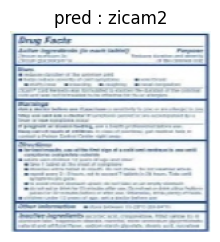

zicam2


In [5]:
# 출력
import matplotlib.pyplot as plt

class_names=list(label_dict.keys()) # class_names=['asprin2','cepacol2','mucinex2','zicam2'....] #정답 라벨링

plt.figure(figsize=(9,9))

for pos in range(len(pred)):

  plt.subplot(4,4,pos+1)
  plt.axis('off')

  pred_str=class_names[np.argmax(pred[pos])]

  plt.title( "pred : " + pred_str)

  plt.imshow(src_img_array[pos])

plt.tight_layout()
plt.show()

print(pred_str)